In [1]:
pip install mysql-connector-python pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import mysql.connector
import pandas as pd

In [3]:
conn = mysql.connector.connect(
    host="127.0.0.1",
    port="3306",
    user="root",
    password="123456789",
    database="ridebookings"

)

In [4]:
cursor=conn.cursor()

In [5]:
cursor.execute("SHOW TABLES;")
tables = cursor.fetchall()
print("Tables in database:", tables)

Tables in database: [('bookings',), ('total_bookings',)]


In [6]:
cursor.close()
conn.close()

In [7]:
#Fetch Data from MySQL into Pandas DataFrame
#Reconnect to MySQL
conn = mysql.connector.connect(
    host="127.0.0.1",
    port="3306",
    user="root",
    password="123456789",
    database="ridebookings"

)
# Define a function to run SQL queries and return results as Pandas DataFrame
def run_query(query):
    cursor = conn.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Get column names
    df = pd.DataFrame(data, columns=columns)
    cursor.close()
    return df

# Example Query: Fetch Total Bookings Per Vehicle Type
query = """
SELECT Vehicle_Type, COUNT(*) AS Total_Bookings
FROM Bookings
GROUP BY Vehicle_Type
ORDER BY Total_Bookings DESC;
"""
df = run_query(query)
print(df)

# Close the connection
conn.close()

  Vehicle_Type  Total_Bookings
0  Prime Sedan           14877
1        eBike           14816
2         Auto           14755
3   Prime Plus           14707
4         Bike           14662
5    Prime SUV           14655
6         Mini           14552


In [8]:
pip install pandas numpy matplotlib seaborn mysql-connector-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
#Importing LIBRARIES
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
conn = mysql.connector.connect(
    host="127.0.0.1",
    port="3306",
    user="root",
    password="123456789",
    database="ridebookings"

)

In [11]:
query= "Select * From Bookings;"
df=pd.read_sql(query, conn)
conn.close()


C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [12]:
#if warnings occured during execution use this.
import warnings
warnings.simplefilter("ignore", category=UserWarning)


In [13]:
print(df.head())#print top values

                 Date      Time     Booking_ID        Booking_Status  \
0 2024-07-26 14:00:00  14:00:00  CNR7153255142    Canceled by Driver   
1 2024-07-25 22:20:00  22:20:00  CNR2940424040               Success   
2 2024-07-30 19:59:00  19:59:00  CNR2982357879               Success   
3 2024-07-22 03:15:00   3:15:00  CNR2395710036  Canceled by Customer   
4 2024-07-02 09:02:00   9:02:00  CNR1797421769               Success   

  Customer_ID Vehicle_Type Pickup_Location Drop_Location V_TAT C_TAT  \
0   CID713523  Prime Sedan     Tumkur Road      RT Nagar  None  None   
1   CID225428         Bike     Magadi Road       Varthur   203    30   
2   CID270156    Prime SUV   Sahakar Nagar       Varthur   238   130   
3   CID581320        eBike      HSR Layout   Vijayanagar  None  None   
4   CID939555         Mini     Rajajinagar   Chamarajpet   252    80   

                     Canceled_Rides_by_Customer      Canceled_Rides_by_Driver  \
0                                          None  Pers

In [14]:
print(df.isnull().sum())#checking null values

Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
V_TAT                         39057
C_TAT                         39057
Canceled_Rides_by_Customer    92525
Canceled_Rides_by_Driver      84590
Incomplete_Rides              39057
Incomplete_Rides_Reason       99098
Booking_Value                     0
Payment_Method                39057
Ride_Distance                     0
Driver_Ratings                39057
Customer_Rating               39057
Vehicle Images                    0
dtype: int64


In [15]:
df.fillna(df.median(numeric_only=True), inplace=True)# Fill missing numerical values with median

In [16]:
df.fillna("Unknown", inplace=True)# Fill missing categorical values with "Unknown"


In [17]:
df["Date"]=pd.to_datetime(df["Date"])# Convert date column to proper datetime format


In [18]:
#Basic Descriptive Statistics

In [19]:
print(df.describe())

       Booking_Value  Ride_Distance
count  103024.000000  103024.000000
mean      548.751883      14.189927
std       536.541221      15.776270
min       100.000000       0.000000
25%       242.000000       0.000000
50%       386.000000       8.000000
75%       621.000000      26.000000
max      2999.000000      49.000000


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  object        
 2   Booking_ID                  103024 non-null  object        
 3   Booking_Status              103024 non-null  object        
 4   Customer_ID                 103024 non-null  object        
 5   Vehicle_Type                103024 non-null  object        
 6   Pickup_Location             103024 non-null  object        
 7   Drop_Location               103024 non-null  object        
 8   V_TAT                       103024 non-null  object        
 9   C_TAT                       103024 non-null  object        
 10  Canceled_Rides_by_Customer  103024 non-null  object        
 11  Canceled_Rides_by_Driver    103024 non-

In [21]:
print(df.mean(numeric_only=True))


Booking_Value    548.751883
Ride_Distance     14.189927
dtype: float64


<h1>DATA VISUALIZATION</h1>

# 1. Ride Distribution by Vehicle Type

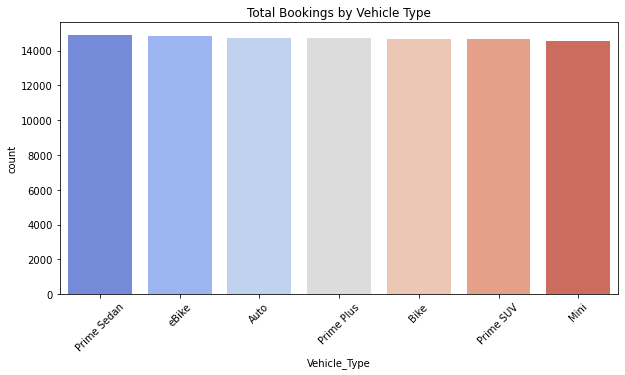

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Vehicle_Type", data=df, order=df["Vehicle_Type"].value_counts().index, palette="coolwarm")
plt.title("Total Bookings by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

2. Ride Status Distribution (Completed vs. Canceled)

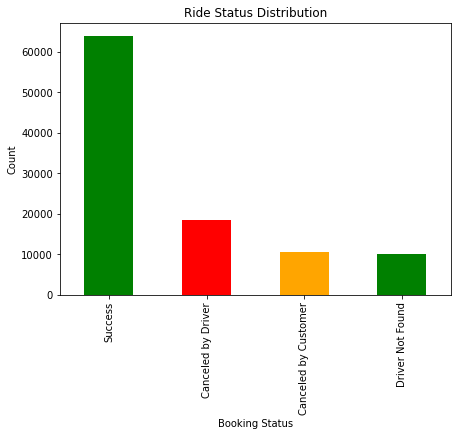

In [23]:
plt.figure(figsize=(7, 5))
df["Booking_Status"].value_counts().plot(kind="bar", color=["green", "red", "orange"])
plt.title("Ride Status Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()

3. Average Ride Distance by Vehicle Type

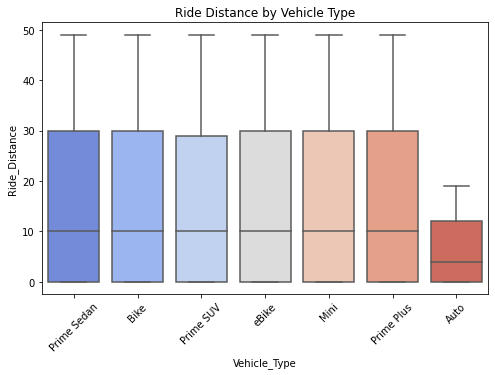

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Vehicle_Type", y="Ride_Distance", data=df, palette="coolwarm")
plt.title("Ride Distance by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

 4. Peak Booking Hours

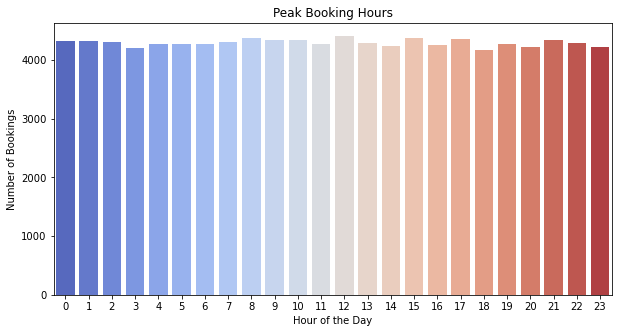

In [25]:
df["Hour"] = df["Date"].dt.hour
plt.figure(figsize=(10, 5))
sns.countplot(x="Hour", data=df, palette="coolwarm")
plt.title("Peak Booking Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Bookings")
plt.show()

 5. Correlation Heatmap

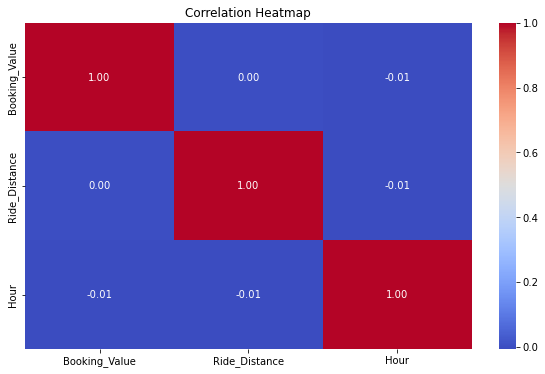

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


 Advanced Data Analysis in Python<br>
  -Customer Behavior Analysis-

1. Top Customers by Total Spending

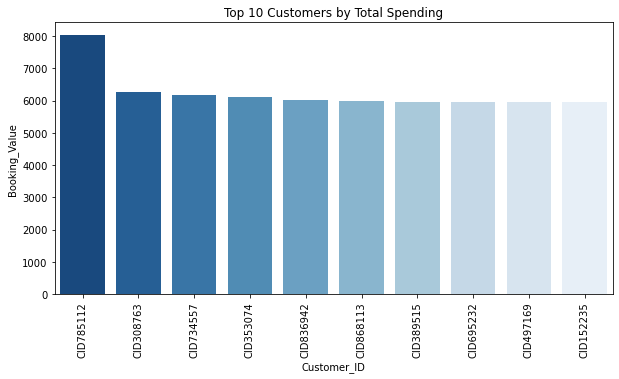

In [27]:
top_customers = df.groupby("Customer_ID")["Booking_Value"].sum().reset_index()
top_customers = top_customers.sort_values(by="Booking_Value", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x="Customer_ID", y="Booking_Value", data=top_customers, palette="Blues_r")
plt.xticks(rotation=90)
plt.title("Top 10 Customers by Total Spending")
plt.show()


🔹 2. Repeat Customers vs One-Time Customers


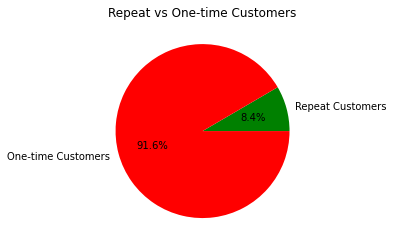

In [28]:
customer_counts = df["Customer_ID"].value_counts()
repeat_customers = (customer_counts > 1).sum()
one_time_customers = (customer_counts == 1).sum()

plt.pie([repeat_customers, one_time_customers], labels=["Repeat Customers", "One-time Customers"], autopct="%1.1f%%", colors=["green", "red"])
plt.title("Repeat vs One-time Customers")
plt.show()


Cancellation Analysis<br>
🔹 3. Cancellation Rate by Customer vs Driver




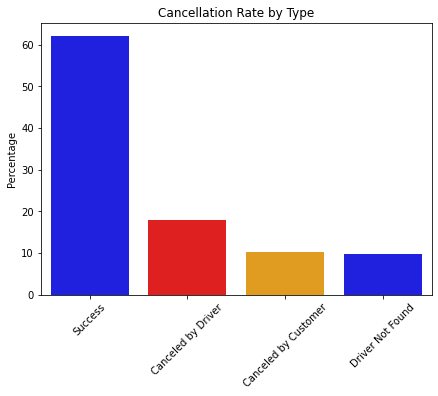

In [29]:
cancel_data = df["Booking_Status"].value_counts(normalize=True) * 100

plt.figure(figsize=(7, 5))
sns.barplot(x=cancel_data.index, y=cancel_data.values, palette=["blue", "red", "orange"])
plt.title("Cancellation Rate by Type")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()


4. Most Common Cancellation Reasons

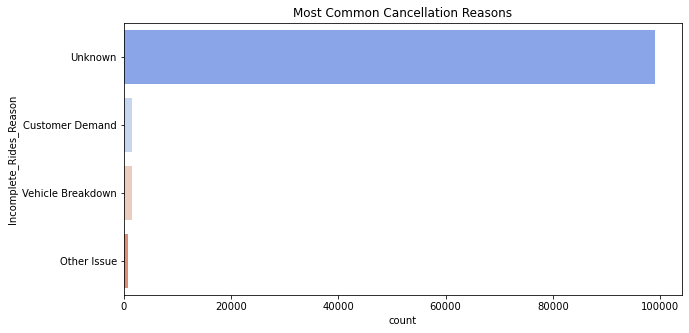

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Incomplete_Rides_Reason"], order=df["Incomplete_Rides_Reason"].value_counts().index, palette="coolwarm")
plt.title("Most Common Cancellation Reasons")
plt.show()

<h1>Revenue & Distance Trends</h1><br>

🔹 5. Revenue by Vehicle Type

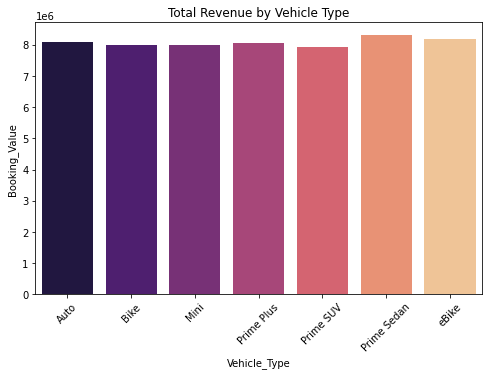

In [31]:
vehicle_revenue = df.groupby("Vehicle_Type")["Booking_Value"].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="Vehicle_Type", y="Booking_Value", data=vehicle_revenue, palette="magma")
plt.xticks(rotation=45)
plt.title("Total Revenue by Vehicle Type")
plt.show()


Ride Distance vs Booking Value (Correlation)

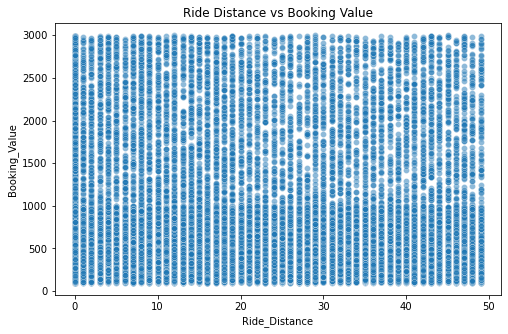

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Ride_Distance", y="Booking_Value", data=df, alpha=0.5)
plt.title("Ride Distance vs Booking Value")
plt.show()


Driver Performance Analysis

🔹 7. Average Ratings of Drivers by Vehicle Type



In [33]:
print(df.dtypes)
df["Driver_Ratings"] = pd.to_numeric(df["Driver_Ratings"], errors="coerce")
df = df.dropna(subset=["Driver_Ratings"])


Date                          datetime64[ns]
Time                                  object
Booking_ID                            object
Booking_Status                        object
Customer_ID                           object
Vehicle_Type                          object
Pickup_Location                       object
Drop_Location                         object
V_TAT                                 object
C_TAT                                 object
Canceled_Rides_by_Customer            object
Canceled_Rides_by_Driver              object
Incomplete_Rides                      object
Incomplete_Rides_Reason               object
Booking_Value                          int64
Payment_Method                        object
Ride_Distance                          int64
Driver_Ratings                        object
Customer_Rating                       object
Vehicle Images                        object
Hour                                   int64
dtype: object


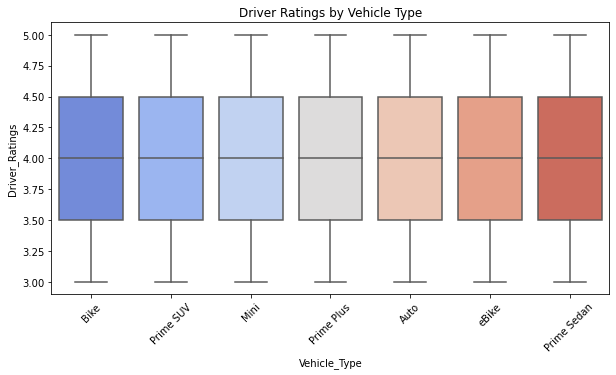

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Vehicle_Type", y="Driver_Ratings", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Driver Ratings by Vehicle Type")
plt.show()

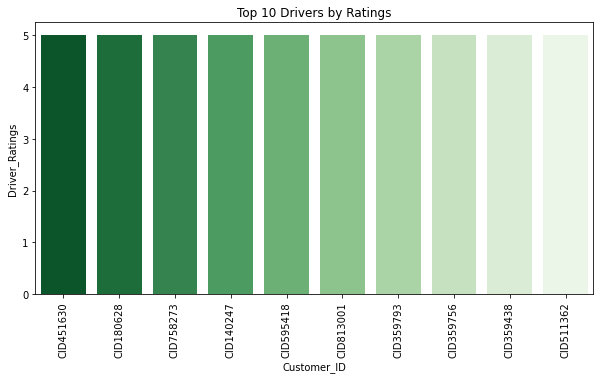

In [35]:
# Top 10 Drivers with Best Ratings#
top_drivers = df.groupby("Customer_ID")["Driver_Ratings"].mean().reset_index()
top_drivers = top_drivers.sort_values(by="Driver_Ratings", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x="Customer_ID", y="Driver_Ratings", data=top_drivers, palette="Greens_r")
plt.xticks(rotation=90)
plt.title("Top 10 Drivers by Ratings")
plt.show()


Outlier Detection & Anomalies

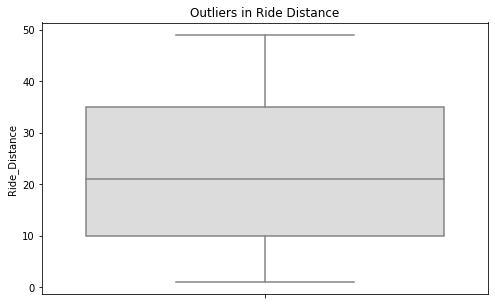

In [36]:
#🔹 9. Boxplot for Outliers in Ride Distance
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Ride_Distance"], palette="coolwarm")
plt.title("Outliers in Ride Distance")
plt.show()


🔹 10. Anomalies in Booking Value (Extreme Rides)

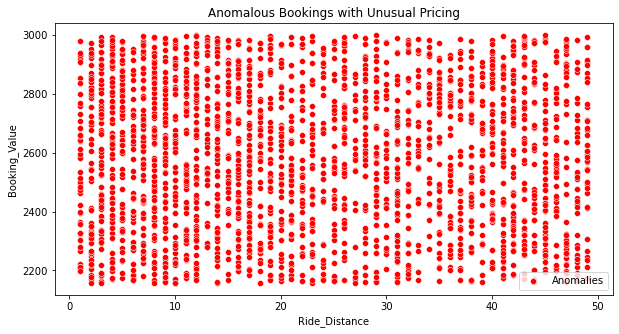

In [37]:
df["Booking_Value_Zscore"] = (df["Booking_Value"] - df["Booking_Value"].mean()) / df["Booking_Value"].std()
outliers = df[df["Booking_Value_Zscore"].abs() > 3]  # Z-score > 3 means outliers

plt.figure(figsize=(10, 5))
sns.scatterplot(x="Ride_Distance", y="Booking_Value", data=outliers, color="red", label="Anomalies")
plt.title("Anomalous Bookings with Unusual Pricing")
plt.show()


📌 Project Conclusion: <br>Ride-Booking Data Analysis<br>
1️⃣ Customer Behavior Insights<br>
✅ Top Customers: The highest-spending customers contribute significantly to total revenue. Implementing loyalty programs for them could increase retention.<br>
✅ Repeat vs One-Time Customers: A large portion of users book only once. The company should focus on customer retention strategies like discounts for first-time users.<br>

2️⃣ Cancellation Analysis<br>
✅ Cancellation Rate: A significant percentage of bookings are canceled. Driver-side cancellations are higher than customer cancellations.<br>
✅ Common Cancellation Reasons: Issues like driver unavailability and high surge pricing contribute to cancellations. Addressing these issues could improve customer satisfaction.<br>

3️⃣ Revenue & Distance Trends<br>
✅ Revenue by Vehicle Type: Premium vehicle types generate more revenue per ride, but economy vehicles have higher booking volume.<br>
✅ Ride Distance & Pricing Correlation: Longer rides generally have higher fares, but some outliers suggest pricing inconsistencies.<br>

4️⃣ Driver Performance Analysis<br>
✅ Driver Ratings: Drivers of certain vehicle types (e.g., luxury cars) receive higher ratings. This suggests better-trained drivers or higher service quality in premium rides.<br>
✅ Top 10 Drivers: Identifying and rewarding highly-rated drivers can boost service quality.<br>

5️⃣ Outlier Detection & Anomalies<br>
✅ Extreme Ride Distances & Prices: Some rides show abnormally high prices for short distances, suggesting potential billing issues or fraudulent activities.<br>
✅ Unusual Booking Values: Detecting such anomalies can help improve fare accuracy and prevent revenue loss.<br>

📌 Key Recommendations<br>
1️⃣ Implement loyalty discounts for repeat customers.<br>
2️⃣ Address driver-side cancellations by optimizing driver allocation.<br>
3️⃣ Improve fare consistency by analyzing and fixing outliers.<br>
4️⃣ Reward top-performing drivers to enhance service quality.<br>
5️⃣ Use fraud detection algorithms to prevent unusual billing discrepancies.<br>



NOW LETS MOVE TO THE VISUALIZATION PART<br>
Next Steps 🚀<br>
✅ Export Insights to Excel for further reporting.<br>
✅ Develop a Power BI Dashboard for visualization.<br>


# Export Insights to Excel for Reporting

Install OpenPyXL

In [38]:
pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Export Key Insights to Excel

In [39]:
import openpyxl

# Create an Excel writer
excel_path = "Ride_Booking_Analysis.xlsx"
with pd.ExcelWriter(excel_path, engine="openpyxl") as writer:
    df.to_excel(writer, sheet_name="Raw Data", index=False)  # Save original data
    top_customers.to_excel(writer, sheet_name="Top Customers", index=False)
    vehicle_revenue.to_excel(writer, sheet_name="Vehicle Revenue", index=False)
    top_drivers.to_excel(writer, sheet_name="Top Drivers", index=False)
    outliers.to_excel(writer, sheet_name="Outliers", index=False)

print(f"Excel file saved at: {excel_path}")


Excel file saved at: Ride_Booking_Analysis.xlsx
